## wine 등급 데이터를 가져와서 -> 선형회귀 모델을 구축-학습-평가-그래프 시각화.

In [18]:
# auto-mpg.csv 를 읽어서 확인해보기. 
import numpy as np 
import pandas as pd 
# header = 0 -> csv 의 컬럼 -> df 의 컬럼으로 사용. 
data_df = pd.read_csv("./winequality-red2.csv", header = 0 , engine="python")
print(f"data_df 의 크기 : {data_df.shape}")
data_df.head()

data_df 의 크기 : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# 특정 컬럼 제외하기. horsepower , orgin , car_name
data_df = data_df.drop(["chlorides", "free sulfur dioxide", "total sulfur dioxide","pH","sulphates"], axis=1, inplace=False)
print(f"data_df 의 크기 : {data_df.shape}")
data_df.head()

data_df 의 크기 : (1599, 7)


,fixed acidity,volatile acidity,citric acid,residual sugar,density,alcohol,quality
0,7.4,0.70,0.00,1.9,0.9978,9.4,5
1,7.8,0.88,0.00,2.6,0.9968,9.8,5
2,7.8,0.76,0.04,2.3,0.9970,9.8,5
3,11.2,0.28,0.56,1.9,0.9980,9.8,6
4,7.4,0.70,0.00,1.9,0.9978,9.4,5


In [20]:
# 기본 컬럼 조사, info() 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
 2   citric acid       1599 non-null   float64
 3   residual sugar    1599 non-null   float64
 4   density           1599 non-null   float64
 5   alcohol           1599 non-null   float64
 6   quality           1599 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [21]:
# 선형 회귀 분석 모델을 활용해서 -> 자동차 연비가 , 어느 피쳐(독립변수, x)의 영향을 받는지 조사
# 선형(직선) 회귀분석을 이용해서 , 분석 모델을 구축 
from sklearn.linear_model import LinearRegression
# 학습용, 테스트용 데이터 분리해주기. 
from sklearn.model_selection import train_test_split
# 분석 평가지수, MSE(오류의 제곱 평균: 낮을수록 좋다. 모델의 예측값이, 실제값과 거의 비슷. )
# R^2, : 예측값 / 실제값 , 나눈 비율. 클수록 좋다. 모델의 예측값이, 실제값과 거의 비슷. 
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# X, Y 분할, 독립변수, 종속 변수를 나누는 작업. 
Y = data_df["quality"]
# PRICE 를 제외한 나머지 변수를 가지고 오기. 
# axis= 1 -> 열 기준, 
# inplace= False : 원본에 영향을 주지 않겠다. 
X = data_df.drop(["quality"], axis= 1 , inplace= False)

In [23]:
# 훈련용, 테스트용으로 데이터를 분리하는 작업. 
# test_size=0.3 비율 , 학습 데이터 : 70%, 평가 데이터 : 30%
# random_state=0 -> 동일한 방식으로 데이터 분할. -> 동일성 보장. 
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [24]:
print(f"X_train : {X_train.shape},X_test : {X_test.shape},Y_train : {Y_train.shape},Y_test : {Y_test.shape}")

X_train : (1119, 6),X_test : (480, 6),Y_train : (1119,),Y_test : (480,)


In [25]:
# 선형 회귀 분석 이용해서, 모델 생성 
lr = LinearRegression()

In [26]:
# 모델을 이용해서, 훈련하기. 모델 학습시키기
lr.fit(X_train, Y_train)

LinearRegression()

In [27]:
# 학습된 모델을 이용해서, 평가하기, 예측값을 이용해서, 실제값과 비교하기. 
# 예) 상용이가 70문제로 학습한 모델을, 테스트 확인 하는 작업,
# 예) 30문제로 평가하기. 예측값 구하기. 
y_predict = lr.predict(X_test)

In [28]:
# 평가 분석 지표 
# MSE : 오류의 제곱 평균
# R^2 Score :  예측값 / 실제값 나눈비율 
#Y_test : 답지, y_predict : 상용이가 학습해서, 시험친 결과 
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2, 값을 통일 시켰다. 나중에, 스케일링을 많이 함, 정규화등으로 고쳐야, 
# 통계시, 효율적으로 작업이 진행되므로, 그래서, 이런 작업을 많이 함. 
rmse = np.sqrt(mse)

r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse} ,r2_value : {r2_value}")

mse : 0.4230810660732082, rmse : 0.6504468203267721 ,r2_value : 0.2829134473335453


In [29]:
# 선형 회귀 분석, 직선의 구성 요소 ,
#  y절편, 계수등에 대해서, 직선을 분석 해보기.
print(f"Y 절편의 값 : {lr.intercept_}")
# mpg	cylinders	displacement	weight	acceleration	model_year
# 독립변수의 계수값 
print(f"회귀 계수의 값 : {np.round(lr.coef_,1)}")

Y 절편의 값 : 12.230139671279609
회귀 계수의 값 : [ 0.1 -1.5 -0.2  0.  -9.5  0.3]


In [30]:
# mpg	cylinders	displacement	weight	acceleration	model_year 값 정리 
coef = pd.Series(data=np.round(lr.coef_,2), index= X.columns)
coef.sort_values(ascending = False)

alcohol             0.31
fixed acidity       0.06
residual sugar      0.00
citric acid        -0.23
volatile acidity   -1.52
density            -9.46
dtype: float64

# 직선 -> y = ax + b
# Y (mpg) = 0.76 x X(model_year) + 0.20 x X(acceleration) + ....
# 계수들은, 모델의 성능을 최적화 할 때, 사용이 되는 하이퍼 매개변수, 웨이트 값(비중값)

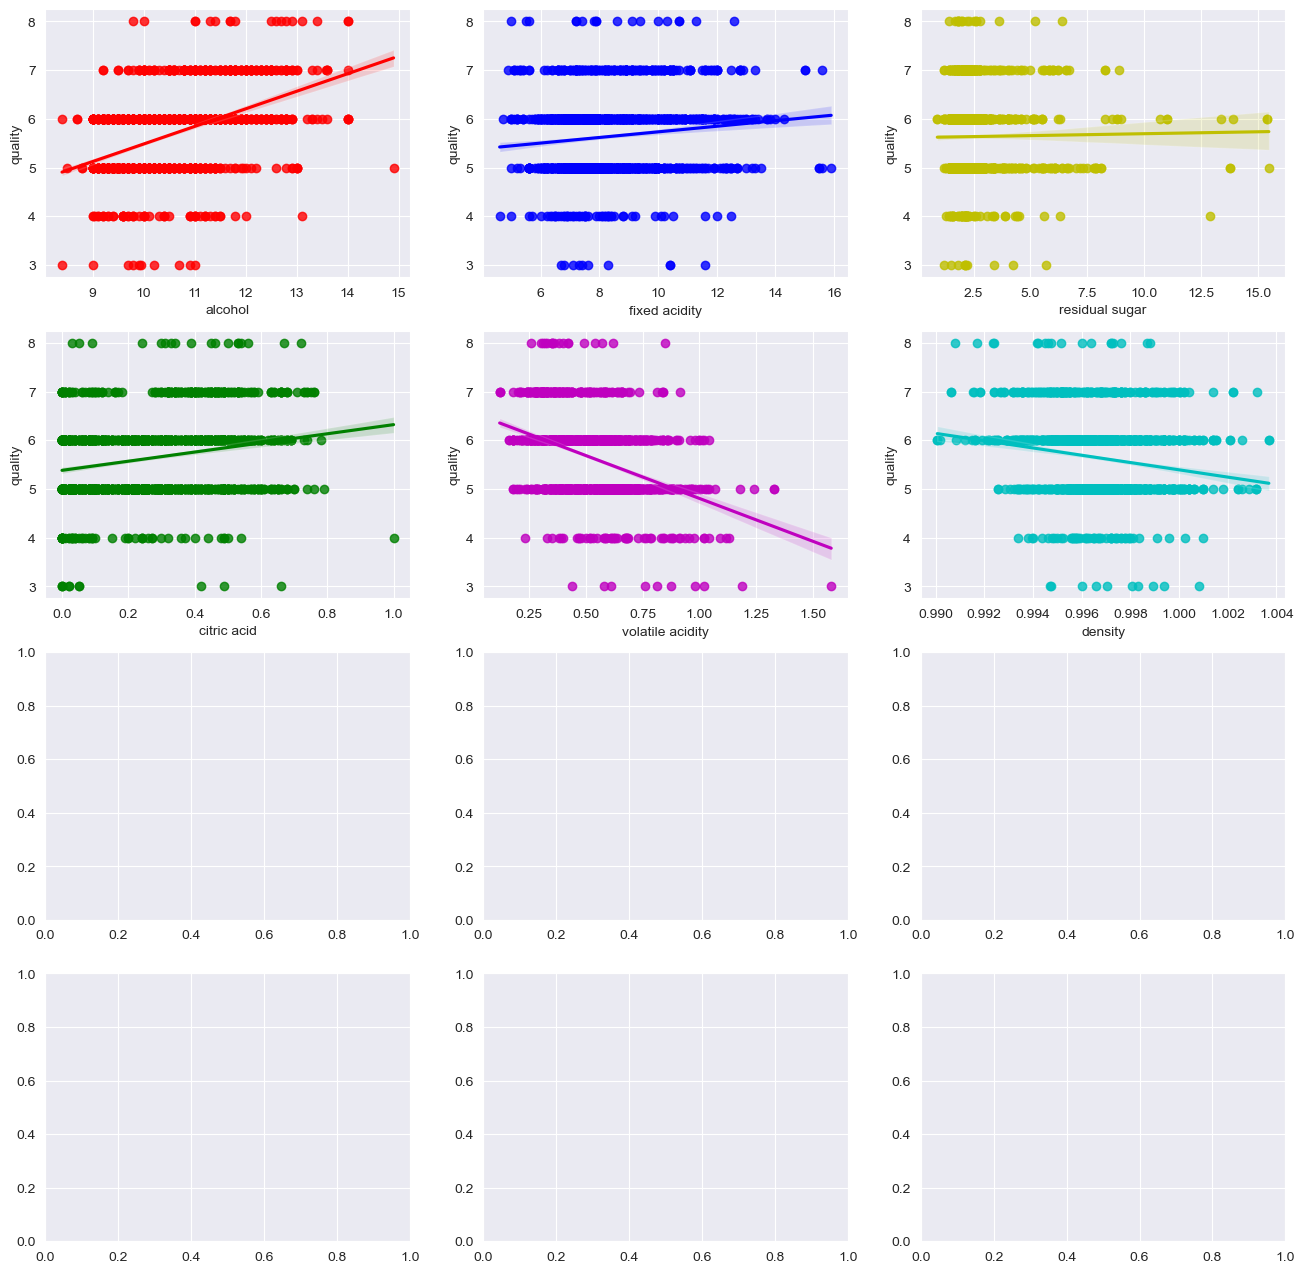

In [32]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표 
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사. 
# 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 이미지들을 , 2 x 3 , 표 형태로 나타내기. 
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 4)

x_features = ["alcohol","fixed acidity","residual sugar", "citric acid","volatile acidity","density"]

# 그래프의 색상 옵션 
plot_color = ["r", "b", "y", "g", "m", "c"]  # 빨강, 파랑, 노랑, 초록, 보라, 청록


for i, feature in enumerate(x_features):
  # 몫 -> 2개 행으로 
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y="quality", data = data_df, ax = axs[row][col], color = plot_color[i])